In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [2]:
car_data = [
    {'Brand': 'BMW', 'Price': 4200.0, 'Body': 'sedan', 'Mileage': 277, 'EngineV': 2.0, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 1991, 'Model': '320'},
    {'Brand': 'Mercedes-Benz', 'Price': 7900.0, 'Body': 'van', 'Mileage': 427, 'EngineV': 2.9, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 1999, 'Model': 'Sprinter 212'},
    {'Brand': 'Mercedes-Benz', 'Price': 13300.0, 'Body': 'sedan', 'Mileage': 358, 'EngineV': 5.0, 'Engine Type': 'Gas', 'Registration': 'yes', 'Year': 2003, 'Model': 'S 500'},
    {'Brand': 'Audi', 'Price': 23000.0, 'Body': 'crossover', 'Mileage': 240, 'EngineV': 4.2, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2007, 'Model': 'Q7'},
    {'Brand': 'Toyota', 'Price': 18300.0, 'Body': 'crossover', 'Mileage': 120, 'EngineV': 2.0, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2011, 'Model': 'Rav 4'},
    {'Brand': 'Mercedes-Benz', 'Price': 199999.0, 'Body': 'crossover', 'Mileage': 0, 'EngineV': 5.5, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2016, 'Model': 'GLS 63'},
    {'Brand': 'BMW', 'Price': 6100.0, 'Body': 'sedan', 'Mileage': 438, 'EngineV': 2.0, 'Engine Type': 'Gas', 'Registration': 'yes', 'Year': 1997, 'Model': '320'},
    {'Brand': 'Audi', 'Price': 14200.0, 'Body': 'vagon', 'Mileage': 200, 'EngineV': 2.7, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2006, 'Model': 'A6'},
    {'Brand': 'Renault', 'Price': 10799.0, 'Body': 'vagon', 'Mileage': 193, 'EngineV': 1.5, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2012, 'Model': 'Megane'},
    {'Brand': 'Volkswagen', 'Price': 1400.0, 'Body': 'other', 'Mileage': 212, 'EngineV': 1.8, 'Engine Type': 'Gas', 'Registration': 'no', 'Year': 1999, 'Model': 'Golf IV'},
    {'Brand': 'Renault', 'Price': 11950.0, 'Body': 'vagon', 'Mileage': 177, 'EngineV': 1.5, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2011, 'Model': 'Megane'},
    {'Brand': 'Renault', 'Price': 2500.0, 'Body': 'sedan', 'Mileage': 260, 'EngineV': 1.79, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 1994, 'Model': '19'},
    {'Brand': 'Audi', 'Price': 9500.0, 'Body': 'vagon', 'Mileage': 165, 'EngineV': 2.7, 'Engine Type': 'Gas', 'Registration': 'yes', 'Year': 2003, 'Model': 'A6 Allroad'},
    {'Brand': 'Volkswagen', 'Price': 10500.0, 'Body': 'sedan', 'Mileage': 100, 'EngineV': 1.8, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2008, 'Model': 'Passat B6'},
    {'Brand': 'Toyota', 'Price': 16000.0, 'Body': 'crossover', 'Mileage': 250, 'EngineV': 4.7, 'Engine Type': 'Gas', 'Registration': 'yes', 'Year': 2001, 'Model': 'Land Cruiser 100'},
    {'Brand': 'Renault', 'Price': 8600.0, 'Body': 'hatch', 'Mileage': 84, 'EngineV': 1.5, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2012, 'Model': 'Clio'},
    {'Brand': 'BMW', 'Price': 2990.0, 'Body': 'other', 'Mileage': 203, 'EngineV': 2.0, 'Engine Type': 'Petrol', 'Registration': 'no', 'Year': 2001, 'Model': '318'},
    {'Brand': 'Mercedes-Benz', 'Price': None, 'Body': 'van', 'Mileage': 240, 'EngineV': 2.2, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2007, 'Model': 'Vito'},
    {'Brand': 'Toyota', 'Price': 26500.0, 'Body': 'crossover', 'Mileage': 21, 'EngineV': 2.0, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2013, 'Model': 'Rav 4'},
    {'Brand': 'Audi', 'Price': 3500.0, 'Body': 'vagon', 'Mileage': 250, 'EngineV': 2.5, 'Engine Type': 'Diesel', 'Registration': 'no', 'Year': 1998, 'Model': 'A6'},
    {'Brand': 'Toyota', 'Price': 38233.0, 'Body': 'other', 'Mileage': 0, 'EngineV': 2.4, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2016, 'Model': 'Hilux'},
    {'Brand': 'Volkswagen', 'Price': 7500.0, 'Body': 'hatch', 'Mileage': 132, 'EngineV': 1.4, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2006, 'Model': 'Polo'},
    {'Brand': 'Audi', 'Price': 6800.0, 'Body': 'sedan', 'Mileage': 225, 'EngineV': 2.4, 'Engine Type': 'Gas', 'Registration': 'yes', 'Year': 1998, 'Model': 'A6'},
    {'Brand': 'Mitsubishi', 'Price': 10500.0, 'Body': 'crossover', 'Mileage': 130, 'EngineV': 2.4, 'Engine Type': 'Gas', 'Registration': 'yes', 'Year': 2006, 'Model': 'Outlander'},
    {'Brand': 'Audi', 'Price': 24900.0, 'Body': 'sedan', 'Mileage': 163, 'EngineV': 4.2, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2008, 'Model': 'A8'},
    {'Brand': 'Volkswagen', 'Price': 20800.0, 'Body': 'crossover', 'Mileage': 151, 'EngineV': 3.0, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2008, 'Model': 'Touareg'},
    {'Brand': 'Audi', 'Price': 6500.0, 'Body': 'sedan', 'Mileage': 330, 'EngineV': 2.4, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 1999, 'Model': 'A6'},
    {'Brand': 'Mercedes-Benz', 'Price': 13566.0, 'Body': 'other', 'Mileage': 171, 'EngineV': 2.2, 'Engine Type': 'Other', 'Registration': 'no', 'Year': 2011, 'Model': 'Vito'},
    {'Brand': 'Mitsubishi', 'Price': 8500.0, 'Body': 'hatch', 'Mileage': 65, 'EngineV': 1.3, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2010, 'Model': 'Colt'},
    {'Brand': 'Mercedes-Benz', 'Price': None, 'Body': 'crossover', 'Mileage': 0, 'EngineV': 4.6, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2016, 'Model': 'GLS 500'},
    {'Brand': 'Audi', 'Price': 2900.0, 'Body': 'sedan', 'Mileage': 1, 'EngineV': 2.3, 'Engine Type': 'Gas', 'Registration': 'yes', 'Year': 1989, 'Model': '100'},
    {'Brand': 'BMW', 'Price': 21500.0, 'Body': 'other', 'Mileage': 72, 'EngineV': 3.0, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2007, 'Model': 'Z4'},
    {'Brand': 'Mitsubishi', 'Price': 17900.0, 'Body': 'crossover', 'Mileage': 87, 'EngineV': 3.8, 'Engine Type': 'Gas', 'Registration': 'yes', 'Year': 2008, 'Model': 'Pajero Wagon'},
    {'Brand': 'BMW', 'Price': 28500.0, 'Body': 'crossover', 'Mileage': 160, 'EngineV': 4.8, 'Engine Type': 'Gas', 'Registration': 'yes', 'Year': 2008, 'Model': 'X5'},
    {'Brand': 'Volkswagen', 'Price': 9800.0, 'Body': 'van', 'Mileage': 160, 'EngineV': 1.9, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2009, 'Model': 'Caddy'},
    {'Brand': 'Toyota', 'Price': 14500.0, 'Body': 'sedan', 'Mileage': 147, 'EngineV': 2.4, 'Engine Type': 'Gas', 'Registration': 'yes', 'Year': 2006, 'Model': 'Camry'},
    {'Brand': 'BMW', 'Price': 6000.0, 'Body': 'sedan', 'Mileage': 300, 'EngineV': 2.8, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 1996, 'Model': '528'},
    {'Brand': 'BMW', 'Price': 67500.0, 'Body': 'crossover', 'Mileage': 1, 'EngineV': 2.5, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2016, 'Model': 'X5'},
    {'Brand': 'Audi', 'Price': 33900.0, 'Body': 'other', 'Mileage': 14, 'EngineV': 1.8, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2014, 'Model': 'TT'},
    {'Brand': 'Audi', 'Price': 2500.0, 'Body': 'sedan', 'Mileage': 180, 'EngineV': None, 'Engine Type': 'Petrol', 'Registration': 'no', 'Year': 2000, 'Model': 'A4'},
    {'Brand': 'Mercedes-Benz', 'Price': 9800.0, 'Body': 'van', 'Mileage': 230, 'EngineV': 2.15, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2004, 'Model': 'Vito'},
    {'Brand': 'Mercedes-Benz', 'Price': 63000.0, 'Body': 'crossover', 'Mileage': 86, 'EngineV': 5.5, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2009, 'Model': 'G 55 AMG'},
    {'Brand': 'BMW', 'Price': 7700.0, 'Body': 'sedan', 'Mileage': 326, 'EngineV': 2.8, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 1998, 'Model': '528'},
    {'Brand': 'Mercedes-Benz', 'Price': 9600.0, 'Body': 'van', 'Mileage': 30, 'EngineV': 2.2, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2006, 'Model': 'Vito'},
    {'Brand': 'Toyota', 'Price': 12800.0, 'Body': 'sedan', 'Mileage': 181, 'EngineV': 2.4, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2008, 'Model': 'Camry'},
    {'Brand': 'BMW', 'Price': 41000.0, 'Body': 'crossover', 'Mileage': 80, 'EngineV': 3.0, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2012, 'Model': 'X6'},
    {'Brand': 'Mitsubishi', 'Price': 2500.0, 'Body': 'sedan', 'Mileage': 220, 'EngineV': 2.4, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 1987, 'Model': 'Galant'},
    {'Brand': 'BMW', 'Price': 3700.0, 'Body': 'sedan', 'Mileage': 231, 'EngineV': 2.5, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 1990, 'Model': '525'},
    {'Brand': 'Mercedes-Benz', 'Price': 29500.0, 'Body': 'sedan', 'Mileage': 134, 'EngineV': 5.0, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2008, 'Model': 'S 500'},
    {'Brand': 'BMW', 'Price': 6500.0, 'Body': 'sedan', 'Mileage': 335, 'EngineV': 2.8, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 1996, 'Model': '528'},
    {'Brand': 'Mercedes-Benz', 'Price': None, 'Body': 'sedan', 'Mileage': 145, 'EngineV': 3.2, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2007, 'Model': 'E-Class'},
    {'Brand': 'Renault', 'Price': 8250.0, 'Body': 'van', 'Mileage': 66, 'EngineV': 1.5, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2014, 'Model': 'Kangoo'},
    {'Brand': 'Mercedes-Benz', 'Price': 19500.0, 'Body': 'crossover', 'Mileage': 172, 'EngineV': 3.5, 'Engine Type': 'Other', 'Registration': 'yes', 'Year': 2008, 'Model': 'ML 350'},
    {'Brand': 'Mercedes-Benz', 'Price': 13500.0, 'Body': 'sedan', 'Mileage': 317, 'EngineV': 5.0, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2001, 'Model': 'S 500'},
    {'Brand': 'Mercedes-Benz', 'Price': 9200.0, 'Body': 'van', 'Mileage': 266, 'EngineV': 2.2, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2008, 'Model': 'Vito'},
    {'Brand': 'Mercedes-Benz', 'Price': None, 'Body': 'crossover', 'Mileage': 0, 'EngineV': 3.0, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2016, 'Model': 'GLS 350'},
    {'Brand': 'Toyota', 'Price': 10900.0, 'Body': 'sedan', 'Mileage': 156, 'EngineV': None, 'Engine Type': 'Gas', 'Registration': 'yes', 'Year': 2005, 'Model': 'Camry'},
    {'Brand': 'Volkswagen', 'Price': 5000.0, 'Body': 'vagon', 'Mileage': 265, 'EngineV': 2.0, 'Engine Type': 'Diesel', 'Registration': 'no', 'Year': 2006, 'Model': 'Passat B6'},
    {'Brand': 'BMW', 'Price': 23900.0, 'Body': 'crossover', 'Mileage': 162, 'EngineV': 4.8, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2007, 'Model': 'X5'},
    {'Brand': 'BMW', 'Price': 36900.0, 'Body': 'sedan', 'Mileage': 81, 'EngineV': 3.0, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2010, 'Model': '730'},
    {'Brand': 'BMW', 'Price': 8900.0, 'Body': 'other', 'Mileage': 253, 'EngineV': 1.8, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 1995, 'Model': '318'},
    {'Brand': 'Renault', 'Price': 7800.0, 'Body': 'van', 'Mileage': 200, 'EngineV': 1.9, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2002, 'Model': 'Trafic'},
    {'Brand': 'BMW', 'Price': 133000.0, 'Body': 'crossover', 'Mileage': 7, 'EngineV': 4.4, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2015, 'Model': 'X5 M'},
    {'Brand': 'BMW', 'Price': 1650.0, 'Body': 'sedan', 'Mileage': 270, 'EngineV': 1.8, 'Engine Type': 'Petrol', 'Registration': 'no', 'Year': 1995, 'Model': '318'},
    {'Brand': 'Mercedes-Benz', 'Price': 50000.0, 'Body': 'sedan', 'Mileage': 240, 'EngineV': 3.5, 'Engine Type': 'Petrol', 'Registration': 'yes', 'Year': 2006, 'Model': 'S 350'},
    {'Brand': 'Renault', 'Price': 9700.0, 'Body': 'van', 'Mileage': 245, 'EngineV': 2.0, 'Engine Type': 'Diesel', 'Registration': 'yes', 'Year': 2008, 'Model': 'Trafic'}
]


In [3]:
# Turn array into a DataFrame
data = pd.DataFrame(car_data)
print(data.head())  


           Brand    Price       Body  Mileage  EngineV Engine Type  \
0            BMW   4200.0      sedan      277      2.0      Petrol   
1  Mercedes-Benz   7900.0        van      427      2.9      Diesel   
2  Mercedes-Benz  13300.0      sedan      358      5.0         Gas   
3           Audi  23000.0  crossover      240      4.2      Petrol   
4         Toyota  18300.0  crossover      120      2.0      Petrol   

  Registration  Year         Model  
0          yes  1991           320  
1          yes  1999  Sprinter 212  
2          yes  2003         S 500  
3          yes  2007            Q7  
4          yes  2011         Rav 4  


In [4]:

data = data.dropna(subset=['Year', 'Mileage', 'EngineV', 'Registration'])  # Drop rows with missing clues
data['Registration'] = data['Registration'].map({'yes': 1, 'no': 0})  
X = data[['Year', 'Mileage', 'EngineV']]  
y = data['Registration']  


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training set classes:", np.unique(y_train)) 


Training set classes: [0 1]


In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [7]:
y_pred = model.predict(X_test)


In [8]:
#  See how good our Predictions  are
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (how often we're right): {accuracy * 100:.2f}%")
print("Confusion Matrix (right vs. wrong Predictions):")
print(confusion_matrix(y_test, y_pred))


Accuracy (how often we're right): 92.31%
Confusion Matrix (right vs. wrong guesses):
[[ 0  1]
 [ 0 12]]


In [13]:
# Display a prediction
new_car = pd.DataFrame({'Year': [2010], 'Mileage': [150], 'EngineV': [2.0]})  # A new car
chance = model.predict_proba(new_car)[0][1]  # Chance of "yes"
Prediction = model.predict(new_car)[0]  # Yes (1) or No (0)
print(f"New car (Year: 2010, Mileage: 150, EngineV: 2.0):")
print(f"Chance of being registered: {chance * 100:.2f}%")
print(f"Prediction: {'Yes' if Prediction == 1 else 'No'}")


New car (Year: 2010, Mileage: 150, EngineV: 2.0):
Chance of being registered: 89.75%
Prediction: Yes


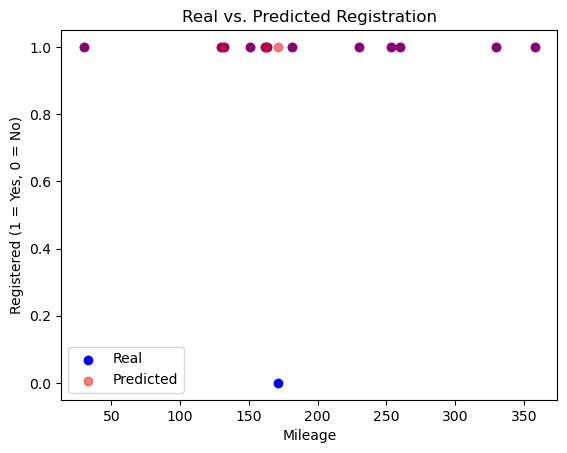

In [14]:
# Picture Illustration of results
plt.scatter(X_test['Mileage'], y_test, color='blue', label='Real')
plt.scatter(X_test['Mileage'], y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Mileage')
plt.ylabel('Registered (1 = Yes, 0 = No)')
plt.legend()
plt.title('Real vs. Predicted Registration')
plt.show()